# Data Reading

## Fine tuning data

In [4]:
import pandas as pd

path_to_train_ft = 'FineTuningData/Train.tsv'
path_to_test_ft = 'FineTuningData/Test.tsv'


ft_train_df = pd.read_csv(path_to_train_ft, delimiter='\t')
ft_test_df = pd.read_csv(path_to_test_ft, delimiter='\t')

columns in the fine tuning dataset:
Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

head of the fine tuning dataset:
   Unnamed: 0         drugName                     condition  \
0      163740      Mirtazapine                    Depression   
1      206473       Mesalamine  Crohn's Disease, Maintenance   
2      159672          Bactrim       Urinary Tract Infection   
3       39293         Contrave                   Weight Loss   
4       97768  Cyclafem 1 / 35                 Birth Control   

                                              review  rating  \
0  "I&#039;ve tried a few antidepressants over th...    10.0   
1  "My son has Crohn&#039;s disease and has done ...     8.0   
2                      "Quick reduction of symptoms"     9.0   
3  "Contrave combines drugs that were used for al...     9.0   
4  "I have been on this birth control for one cyc...     9.0   

                 date  usefulCount  
0   

## Classification Data

In [5]:
path_to_train = 'ClassificationData/train_df.tsv'
path_to_test = 'ClassificationData/test_df.tsv'
path_to_val = 'ClassificationData/val_df.tsv'
train_df = pd.read_csv(path_to_train, delimiter='\t')
test_df = pd.read_csv(path_to_test, delimiter='\t')
val_df = pd.read_csv(path_to_val, delimiter='\t')

columns in the classification dataset:
Index(['Unnamed: 0', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects',
       'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview'],
      dtype='object')

head of the classification dataset:
   Unnamed: 0 urlDrugName  rating           effectiveness  \
0        3318    dilantin       9        Highly Effective   
1        2096      renova       8  Considerably Effective   
2        3179     desyrel       9  Considerably Effective   
3        1214      prozac      10  Considerably Effective   
4        1960      lyrica       1             Ineffective   

             sideEffects                           condition  \
0  Moderate Side Effects                            seizures   
1    Severe Side Effects                   hyperpigmentation   
2      Mild Side Effects                  poor sleep quality   
3      Mild Side Effects    serotonin imbalance, mood swings   
4    Severe Side Effects  neuropathic pain aand fibromyalgi

# Preprocessing

In [6]:
train_df = train_df.dropna(subset=['commentsReview', 'rating'])
val_df = val_df.dropna(subset=['commentsReview', 'rating'])
test_df = test_df.dropna(subset=['commentsReview', 'rating'])
ft_train_df = ft_train_df.dropna(subset=['review', 'rating'])
ft_test_df = ft_test_df.dropna(subset=['review', 'rating'])


## filtering too short and too large texts

In [7]:
def word_count(sentence):
    return len(sentence.split())

# Applying the function and filtering the DataFrame
def filtering(df, df_name, threshold_small, threshold_large):
    if df_name == "Fine-Tuning":
        col_name = 'review'
    elif df_name == "Classification":
        col_name = 'commentsReview'

    df_filtered = df[df[col_name].apply(word_count) >= threshold_small]
    print(f'{len(df)-len(df_filtered)} out of {len(df)} rows have have been removed due to short review!')
    df_filtered_2 = df_filtered[df_filtered[col_name].apply(word_count) <= threshold_large]
    print(f'{len(df_filtered)-len(df_filtered_2)} out of {len(df_filtered)} rows have have been removed due to long review!')

    return df_filtered_2



In [8]:
threshold_short = 5
threshold_large = 150
ft_train_df = filtering(ft_train_df, 'Fine-Tuning', threshold_short, threshold_large)
ft_test_df = filtering(ft_test_df, 'Fine-Tuning', threshold_short, threshold_large)
train_df = filtering(train_df, 'Classification', threshold_short, threshold_large)
val_df = filtering(val_df, 'Classification', threshold_short, threshold_large)
test_df = filtering(test_df, 'Classification', threshold_short, threshold_large)

1655 out of 161297 rows have have been removed due to short review!
3330 out of 159642 rows have have been removed due to long review!
555 out of 53766 rows have have been removed due to short review!
1135 out of 53211 rows have have been removed due to long review!
66 out of 2169 rows have have been removed due to short review!
65 out of 2103 rows have have been removed due to long review!
31 out of 930 rows have have been removed due to short review!
26 out of 899 rows have have been removed due to long review!
23 out of 1036 rows have have been removed due to short review!
24 out of 1013 rows have have been removed due to long review!


## label conversion

In [9]:
# Function to convert rating to labels

def rating_to_label(rating):
    if 0.0 <= rating <= 3.0:
        return 0
    elif 4.0 <= rating <= 7.0:
        return 1
    elif rating >= 8.0:
        return 2
    else:
        raise ValueError("Invalid rating!")

# Apply the function to the 'rating' column to create a new 'label' column
## Fine tuning dataset
ft_train_df['label'] = ft_train_df['rating'].apply(rating_to_label)
ft_test_df['label'] = ft_test_df['rating'].apply(rating_to_label)

## Classification Dataset
train_df['label'] = train_df['rating'].apply(rating_to_label)
val_df['label'] = val_df['rating'].apply(rating_to_label)
test_df['label'] = test_df['rating'].apply(rating_to_label)

# Label counts i each set
def label_count_func(train_data, test_data, data_name, val_data = None):
  train_label_counts = train_data['label'].value_counts()
  test_label_counts = test_data['label'].value_counts()
  if data_name == "Classification":
      val_label_counts = val_data['label'].value_counts()
  print(f'\n{data_name} Dataset label counts in each set')
  print(f"- Training Data:\n{train_label_counts}\n")
  print(f"- Test Data:\n{test_label_counts}")
  if data_name == "Classification":
      print(f"- Val Data:\n{val_label_counts}")

## Fine tuning dataset
label_count_func(ft_train_df, ft_test_df, "Fine-Tuning")

## Classification Dataset
label_count_func(train_df, test_df, "Classification", val_df)



Fine-Tuning Dataset label counts in each set
- Training Data:
label
2    94094
0    34192
1    28026
Name: count, dtype: int64

- Test Data:
label
2    31231
0    11551
1     9294
Name: count, dtype: int64

Classification Dataset label counts in each set
- Training Data:
label
2    1171
1     511
0     356
Name: count, dtype: int64

- Test Data:
label
2    526
1    274
0    189
Name: count, dtype: int64
- Val Data:
label
2    503
1    217
0    153
Name: count, dtype: int64


## Doing lower case

In [ ]:
import pandas as pd

def lowercase_text_columns(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.lower()
    return df

## fine tuning dataset
ft_train_df = lowercase_text_columns(ft_train_df)
ft_test_df = lowercase_text_columns(ft_test_df)

## classification dataset
train_df = lowercase_text_columns(train_df)
test_df = lowercase_text_columns(test_df)
val_df = lowercase_text_columns(val_df)

## Removing stop words, do POS, and lemmatization

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import string
import re


# Ensure that NLTK's resources are up-to-date and downloaded
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Combine the default STOPWORDS set with nltk's set for a larger list
combined_stopwords = set(stopwords.words('english'))

# Optional: Add any custom stop-words that are not relevant for sentiment analysis
additional_stopwords = {'mg', 'week', 'weeks', 'day', 'days', 'month', 'months', 'year', 'years', 'hour', 'hours', 'time', 'pill', 'drug', 'medication', 'dose', 'dosage', 'medicine'}
combined_stopwords = combined_stopwords.union(additional_stopwords)


In [ ]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Helper function to get wordnet POS tag
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# Preprocessing function
def preprocess_dataframe(df, column, remove_stop_words = True, remove_punct=False, lemmatization=False):
    # stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    def preprocess_text(text):
        if not isinstance(text, str):
            # Return an empty string for non-strings or handle as required
            return ''
        text = re.sub(r'&[a-zA-Z0-9#]+;', '', text)  # Remove HTML entities like '&#039;'
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Tokenization and stopword removal
        words = word_tokenize(text)
        if remove_stop_words:
            words = [word for word in words if word.lower() not in combined_stopwords]

        # Punctuation removal
        if remove_punct:
            words = [word for word in words if word not in string.punctuation]

        # Lemmatization
        if lemmatization:
            words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]

        return ' '.join(words)

    df[column] = df[column].apply(preprocess_text)
    return df

In [ ]:
## fine tuning dataset
ft_train_df = preprocess_dataframe(ft_train_df, "review", remove_stop_words = False)
ft_test_df = preprocess_dataframe(ft_test_df, "review", remove_stop_words = False)

In [ ]:
train_df = preprocess_dataframe(train_df, "commentsReview", remove_stop_words = False)
val_df = preprocess_dataframe(val_df, "commentsReview", remove_stop_words = False)
test_df = preprocess_dataframe(test_df, "commentsReview", remove_stop_words = False)

# Visualization

## plotting class distribution

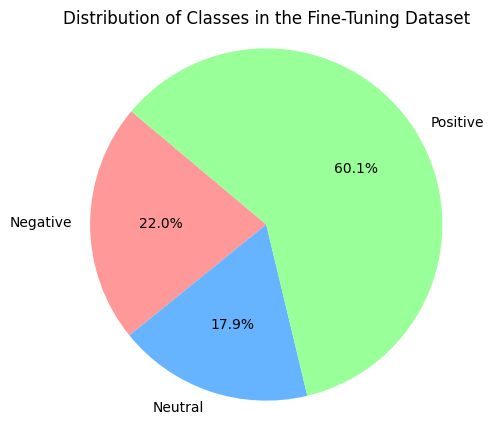

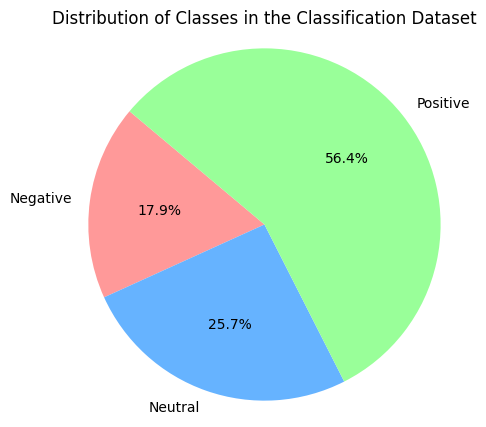

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_labels(train_data, test_data, data_name, val_data = None):
  if data_name == "Classification":
    combined_label_counts = train_data['label'].value_counts() + test_data['label'].value_counts() + val_data['label'].value_counts()
  else:
    combined_label_counts = train_data['label'].value_counts() + test_data['label'].value_counts()
  combined_label_counts = combined_label_counts.sort_index()
  labels = ['Negative', 'Neutral', 'Positive']
  colors = ['#ff9999','#66b3ff','#99ff99']
  plt.figure(figsize=(5, 5))
  plt.pie(combined_label_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
  plt.title(f'Distribution of Classes in the {data_name} Dataset')
  plt.axis('equal')
  plt.show()

## Fine Tuning dataset
plot_labels(ft_train_df, ft_test_df, "Fine-Tuning")

## classificaiton dataset
plot_labels(train_df, test_df, "Classification", val_df)


## Drug Name Analysis

Analysis of drugs in the Fine-Tuning dataset
Number of unique drugs: 3618



/home/u1363916/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/u1363916/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/u1363916/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


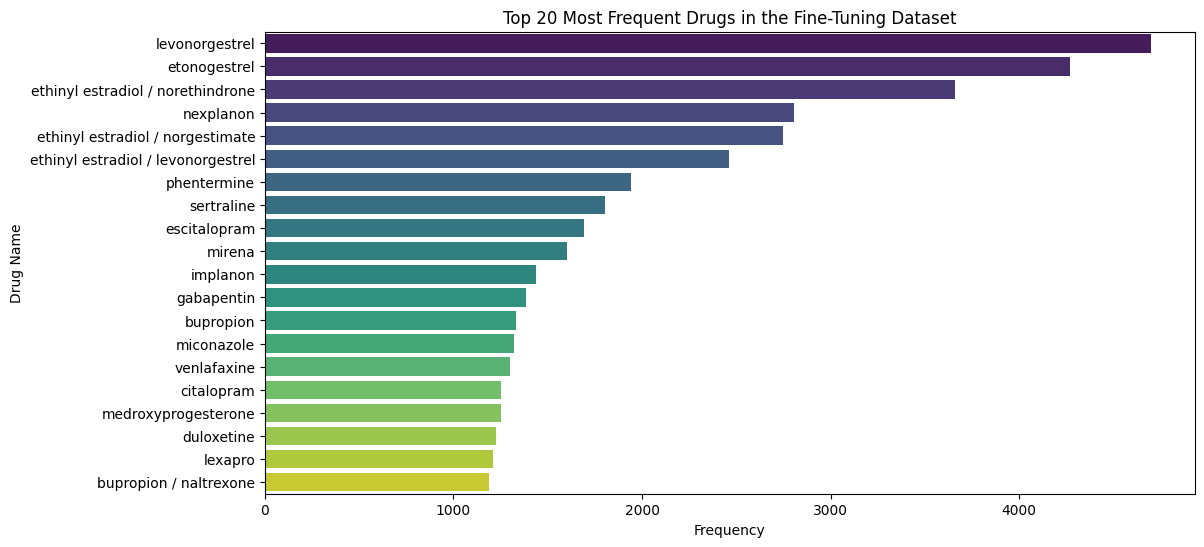

Analysis of drugs in the Classification dataset
Number of unique drugs: 533



/home/u1363916/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/u1363916/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/u1363916/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


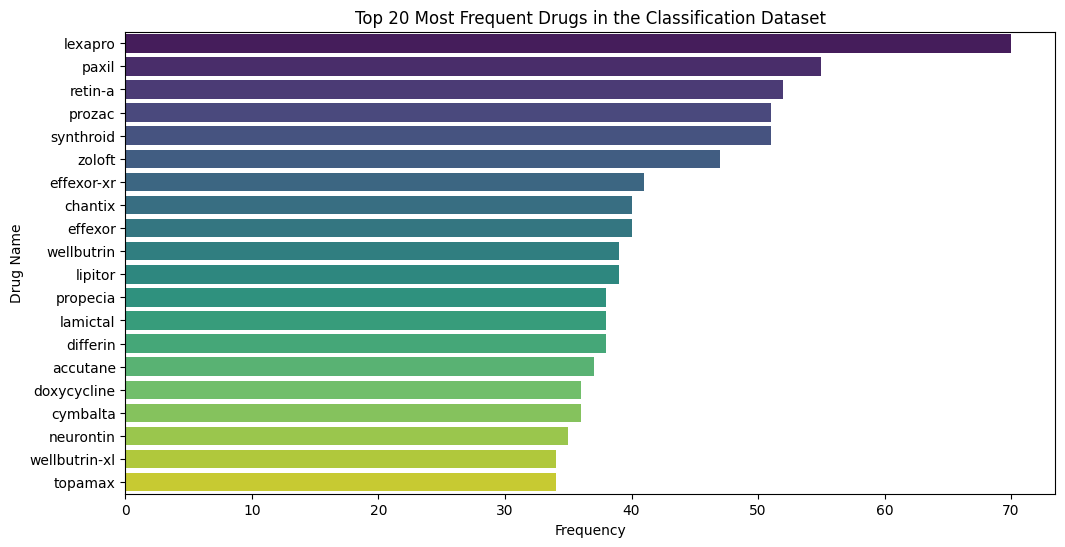

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def drug_name_analysis(train_data, test_data, data_name, val_data=None):
  if data_name == "Classification":
    combined_df = pd.concat([train_data, test_data, val_data])
    drug_col_name = 'urlDrugName'
  else:
    combined_df = pd.concat([train_data, test_data])
    drug_col_name = 'drugName'

  combined_df[drug_col_name] = combined_df[drug_col_name].str.lower()
  unique_drugs_count = combined_df[drug_col_name].nunique()
  print(f"Analysis of drugs in the {data_name} dataset")
  print(f"Number of unique drugs: {unique_drugs_count}\n")

  top10_drugs = combined_df[drug_col_name].value_counts().head(20)

  plt.figure(figsize=(12, 6))
  sns.barplot(x=top10_drugs.values, y=top10_drugs.index, palette='viridis')
  plt.xlabel('Frequency')
  plt.ylabel('Drug Name')
  plt.title(f'Top 20 Most Frequent Drugs in the {data_name} Dataset')
  plt.show()


## fine tuning dataset
drug_name_analysis(ft_train_df, ft_test_df, "Fine-Tuning")

## classification dataset
drug_name_analysis(train_df, test_df,  "Classification", val_df)

# Fine tuning BERT

## hyperparameter tuning fine tuning data

In [ ]:
# import pandas as pd

# # Assuming 'ft_train_df' is your full dataset DataFrame and it includes a 'label' column
# small_dfs = []

# for label in ft_train_df['label'].unique():
#     # Sample instances for each class
#     small_dfs.append(ft_train_df[ft_train_df['label'] == label].sample(n=1500))

# # Concatenate all the small dataframes and shuffle the dataset
# small_df_train_ft = pd.concat(small_dfs).sample(frac=1).reset_index(drop=True)
# print(small_df_train_ft['label'].value_counts())

In [ ]:
# small_df_train_ft.shape

In [ ]:
# import pandas as pd

# # Assuming 'ft_train_df' is your full dataset DataFrame and it includes a 'label' column
# small_dfs = []

# for label in ft_test_df['label'].unique():
#     # Sample instances for each class
#     small_dfs.append(ft_test_df[ft_test_df['label'] == label].sample(n=300))

# # Concatenate all the small dataframes and shuffle the dataset
# small_df_test_ft = pd.concat(small_dfs).sample(frac=1).reset_index(drop=True)
# print(small_df_test_ft['label'].value_counts())


In [ ]:
# train_texts_hyper_tuning = small_df_train_ft['review']#.iloc[:2000]
# val_texts_hyper_tuning = small_df_test_ft['review']#.iloc[:200]
# train_labels_hyper_tuning = small_df_train_ft['label']#.iloc[:2000]
# val_labels_hyper_tuning = small_df_test_ft['label']#.iloc[:200]

In [ ]:
# import torch
# from transformers import BertTokenizer

# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# def encode_texts(texts):
#     return tokenizer(texts.tolist(), padding=True, truncation=True, max_length=threshold_large)


# class ReviewDataset(torch.utils.data.Dataset):
#     def __init__(self, encodings, labels):
#         self.encodings = encodings
#         self.labels = labels

#     def __getitem__(self, idx):
#         item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
#         item['labels'] = torch.tensor(self.labels[idx])
#         return item

#     def __len__(self):
#         return len(self.labels)


# train_encodings_hyper_tuning = encode_texts(train_texts_hyper_tuning)
# val_encodings_hyper_tuning = encode_texts(val_texts_hyper_tuning)

# train_dataset_hyper_tuning = ReviewDataset(train_encodings_hyper_tuning, train_labels_hyper_tuning)
# val_dataset_hyper_tuning = ReviewDataset(val_encodings_hyper_tuning, val_labels_hyper_tuning)

In [ ]:
# import optuna
# from transformers import BertForSequenceClassification, BertConfig, Trainer, TrainingArguments
# from sklearn.metrics import accuracy_score, precision_recall_fscore_support
# from optuna.pruners import MedianPruner


# def compute_metrics(pred):
#     labels = pred.label_ids
#     preds = pred.predictions.argmax(-1)
#     precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
#     acc = accuracy_score(labels, preds)
#     return {
#         'accuracy': acc,
#         'f1': f1,
#         'precision': precision,
#         'recall': recall
#     }

# def model_init():
#     return BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

# def objective(trial):
#     learning_rate = trial.suggest_float("learning_rate", 1e-6, 1e-3, log=True)
#     warmup_steps = trial.suggest_int("warmup_steps", 0, 700)
#     weight_decay = trial.suggest_float("weight_decay", 0.0, 0.1)

#     training_args = TrainingArguments(
#         output_dir='./results',
#         learning_rate=learning_rate,
#         per_device_train_batch_size=16,
#         per_device_eval_batch_size=16,
#         num_train_epochs=10,
#         logging_dir='./logs_hyperparam_tuning',
#         logging_steps=10,
#         warmup_steps=warmup_steps,
#         weight_decay=weight_decay,
#         evaluation_strategy="epoch",
#         save_strategy="no"
#     )

#     trainer = Trainer(
#         model_init=model_init,
#         args=training_args,
#         train_dataset=train_dataset_hyper_tuning,
#         eval_dataset=val_dataset_hyper_tuning,
#         compute_metrics=compute_metrics
#     )
#     trainer.train()
#     eval_results = trainer.evaluate()
#     for key, value in eval_results.items():
#       trial.set_user_attr(key, value)
    
#     return eval_results["eval_loss"]

# # study = optuna.create_study(direction="minimize", pruner=MedianPruner())
# # study.optimize(objective, n_trials=30, show_progress_bar=True)
# # pruner = MedianPruner(n_startup_trials=5, n_warmup_steps=1)
# study = optuna.create_study(direction="minimize")
# study.optimize(objective, n_trials=40, show_progress_bar=True)


## hyper param tuning small data

In [ ]:
# import pandas as pd

# # Assuming 'ft_train_df' is your full dataset DataFrame and it includes a 'label' column
# small_dfs_class_data = []

# for label in train_df['label'].unique():
#     # Sample instances for each class
#     small_dfs_class_data.append(train_df[train_df['label'] == label].sample(n=400))

# # Concatenate all the small dataframes and shuffle the dataset
# small_df_train = pd.concat(small_dfs_class_data).sample(frac=1).reset_index(drop=True)
# print(small_df_train['label'].value_counts())

In [ ]:
# import pandas as pd

# # Assuming 'ft_train_df' is your full dataset DataFrame and it includes a 'label' column
# small_dfs_class_data = []

# for label in test_df['label'].unique():
#     # Sample instances for each class
#     small_dfs_class_data.append(test_df[test_df['label'] == label].sample(n=100))

# # Concatenate all the small dataframes and shuffle the dataset
# small_df_test = pd.concat(small_dfs_class_data).sample(frac=1).reset_index(drop=True)
# print(small_df_test['label'].value_counts())


In [20]:
small_df_train = train_df.reset_index(drop=True)
small_df_val = val_df.reset_index(drop=True)
small_df_test = test_df.reset_index(drop=True)

In [21]:
small_train_texts = small_df_train['commentsReview']
small_val_texts = small_df_val['commentsReview']
small_test_texts = small_df_test['commentsReview']

small_train_labels = small_df_train['label']
small_val_labels = small_df_val['label']
small_test_labels = small_df_test['label']

In [22]:
import torch
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def encode_texts(texts):
    return tokenizer(texts.tolist(), padding=True, truncation=True, max_length=threshold_large)


class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


small_train_encodings = encode_texts(small_train_texts)
small_val_encodings = encode_texts(small_val_texts)
small_test_encodings = encode_texts(small_test_texts)
small_train_dataset = ReviewDataset(small_train_encodings, small_train_labels)
small_val_dataset = ReviewDataset(small_val_encodings, small_val_labels)
small_test_dataset = ReviewDataset(small_test_encodings, small_test_labels)


/home/u1363916/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
import optuna
from transformers import BertForSequenceClassification, BertConfig, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from optuna.pruners import MedianPruner


def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

def model_init():
    return BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

def objective(trial):
    learning_rate = trial.suggest_float("learning_rate", 1e-6, 1e-3, log=True)
    warmup_steps = trial.suggest_int("warmup_steps", 0, 700)
    weight_decay = trial.suggest_float("weight_decay", 0.0, 0.1)

    training_args = TrainingArguments(
        output_dir='./results_small',
        learning_rate=learning_rate,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        num_train_epochs=10,
        logging_dir='./logs_hyperparam_tuning_small',
        logging_steps=10,
        warmup_steps=warmup_steps,
        weight_decay=weight_decay,
        evaluation_strategy="epoch",
        save_strategy="no"
    )

    trainer = Trainer(
        model_init=model_init,
        args=training_args,
        train_dataset=small_train_dataset,
        eval_dataset=small_val_dataset,
        compute_metrics=compute_metrics
    )
    trainer.train()
    eval_results = trainer.evaluate()
    for key, value in eval_results.items():
      trial.set_user_attr(key, value)
    
    return eval_results["eval_loss"]

# study = optuna.create_study(direction="minimize", pruner=MedianPruner())
# study.optimize(objective, n_trials=30, show_progress_bar=True)
# pruner = MedianPruner(n_startup_trials=5, n_warmup_steps=1)
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30, show_progress_bar=True)


2023-12-05 21:39:58.105241: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-05 21:39:58.143924: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-05 21:39:58.143971: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-05 21:39:58.144004: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-05 21:39:58.152562: I tensorflow/core/platform/cpu_feature_g

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.006100,0.956885,0.576174,0.421244,0.331977,0.576174
2,0.797500,0.813284,0.630011,0.566476,0.583064,0.630011
3,0.673300,0.727107,0.699885,0.667173,0.681724,0.699885
4,0.552400,0.751998,0.719359,0.705980,0.703107,0.719359
5,0.324800,0.843205,0.749141,0.737633,0.741974,0.749141
6,0.099600,1.064617,0.723940,0.721122,0.731536,0.723940
7,0.133700,1.182511,0.743414,0.740225,0.742909,0.743414
8,0.055900,1.285370,0.735395,0.736866,0.739940,0.735395
9,0.016300,1.387884,0.726231,0.728741,0.734525,0.726231
10,0.009700,1.402479,0.735395,0.736079,0.739956,0.735395


/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best trial: 0. Best value: 1.40248:   3%|▎         | 1/30 [03:02<1:28:14, 182.56s/it]

[I 2023-12-05 21:43:01,999] Trial 0 finished with value: 1.4024792909622192 and parameters: {'learning_rate': 1.9852391519233946e-05, 'warmup_steps': 192, 'weight_decay': 0.04361028654553423}. Best is trial 0 with value: 1.4024792909622192.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.018600,0.966612,0.576174,0.421244,0.331977,0.576174
2,0.895500,0.943608,0.576174,0.421244,0.331977,0.576174
3,0.831300,0.837103,0.628866,0.543128,0.579761,0.628866
4,0.730300,0.743197,0.688431,0.669212,0.668866,0.688431
5,0.619600,0.703909,0.729668,0.717221,0.715361,0.729668
6,0.348900,0.754811,0.726231,0.725017,0.725921,0.726231
7,0.260400,0.788308,0.747995,0.740881,0.741850,0.747995
8,0.186300,0.857755,0.735395,0.731970,0.730633,0.735395
9,0.121300,0.919123,0.746850,0.744113,0.746652,0.746850
10,0.099400,0.932035,0.749141,0.745675,0.747148,0.749141


/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best trial: 1. Best value: 0.932035:   7%|▋         | 2/30 [06:01<1:24:14, 180.52s/it]

[I 2023-12-05 21:46:01,093] Trial 1 finished with value: 0.9320353865623474 and parameters: {'learning_rate': 1.2388871202005193e-05, 'warmup_steps': 391, 'weight_decay': 0.0853973606872227}. Best is trial 1 with value: 0.9320353865623474.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.018200,0.992508,0.576174,0.421550,0.332357,0.576174
2,0.928200,0.968265,0.576174,0.421244,0.331977,0.576174
3,0.928900,0.959519,0.576174,0.421244,0.331977,0.576174
4,0.901900,0.946538,0.576174,0.421244,0.331977,0.576174
5,0.946200,0.932135,0.576174,0.421244,0.331977,0.576174
6,0.956300,0.922082,0.576174,0.421244,0.331977,0.576174
7,0.838100,0.908004,0.577320,0.426151,0.498554,0.577320
8,0.831900,0.891361,0.585338,0.447641,0.572602,0.585338
9,0.805800,0.885767,0.587629,0.461537,0.541730,0.587629
10,0.845200,0.884491,0.588774,0.462435,0.553699,0.588774


/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/pytho

Best trial: 2. Best value: 0.884491:  10%|█         | 3/30 [09:01<1:21:06, 180.24s/it]

[I 2023-12-05 21:49:01,005] Trial 2 finished with value: 0.8844914436340332 and parameters: {'learning_rate': 2.9384247005393795e-06, 'warmup_steps': 338, 'weight_decay': 0.07224412929522686}. Best is trial 2 with value: 0.8844914436340332.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.017700,0.990992,0.576174,0.421550,0.332357,0.576174
2,0.926000,0.966921,0.576174,0.421244,0.331977,0.576174
3,0.920300,0.956682,0.576174,0.421244,0.331977,0.576174
4,0.908500,0.949421,0.576174,0.421244,0.331977,0.576174
5,0.958600,0.942949,0.576174,0.421244,0.331977,0.576174
6,0.969600,0.942241,0.576174,0.421550,0.332357,0.576174
7,0.882000,0.933213,0.575029,0.421018,0.332077,0.575029
8,0.871300,0.926006,0.575029,0.421018,0.332077,0.575029
9,0.872400,0.921431,0.575029,0.421018,0.332077,0.575029
10,0.894900,0.920547,0.575029,0.421018,0.332077,0.575029


/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/pytho

Best trial: 2. Best value: 0.884491:  13%|█▎        | 4/30 [12:01<1:18:01, 180.06s/it]

[I 2023-12-05 21:52:00,793] Trial 3 finished with value: 0.9205471277236938 and parameters: {'learning_rate': 2.070448589189971e-06, 'warmup_steps': 222, 'weight_decay': 0.09318762361596165}. Best is trial 2 with value: 0.8844914436340332.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.012200,0.968170,0.576174,0.421244,0.331977,0.576174
2,0.879100,0.941965,0.576174,0.421244,0.331977,0.576174
3,0.842600,0.866362,0.576174,0.421244,0.331977,0.576174
4,0.761800,0.826324,0.632302,0.552387,0.675812,0.632302
5,0.723100,0.795359,0.681558,0.653076,0.668291,0.681558
6,0.638500,0.764252,0.687285,0.681257,0.678513,0.687285
7,0.507300,0.763254,0.697595,0.681382,0.677439,0.697595
8,0.464700,0.769952,0.703322,0.690343,0.690243,0.703322
9,0.390100,0.762241,0.715922,0.705023,0.706383,0.715922
10,0.384100,0.760932,0.710195,0.700386,0.699159,0.710195


/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best trial: 4. Best value: 0.760932:  17%|█▋        | 5/30 [15:00<1:14:50, 179.61s/it]

[I 2023-12-05 21:54:59,589] Trial 4 finished with value: 0.7609323263168335 and parameters: {'learning_rate': 7.44810160253326e-06, 'warmup_steps': 141, 'weight_decay': 0.029876094655993835}. Best is trial 4 with value: 0.7609323263168335.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.010600,0.946540,0.576174,0.421244,0.331977,0.576174
2,0.790800,0.797483,0.649485,0.573230,0.614505,0.649485
3,0.648700,0.717049,0.711340,0.692449,0.695607,0.711340
4,0.533100,0.716741,0.741123,0.731034,0.729411,0.741123
5,0.326700,0.792865,0.736541,0.733053,0.733683,0.736541
6,0.134700,0.882146,0.751432,0.746161,0.745012,0.751432
7,0.194600,0.949243,0.754868,0.747692,0.751192,0.754868
8,0.139300,1.111444,0.739977,0.736603,0.738713,0.739977
9,0.085500,1.127672,0.739977,0.735817,0.733754,0.739977
10,0.044700,1.150867,0.747995,0.744093,0.744064,0.747995


/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best trial: 4. Best value: 0.760932:  20%|██        | 6/30 [17:59<1:11:52, 179.68s/it]

[I 2023-12-05 21:57:59,410] Trial 5 finished with value: 1.1508665084838867 and parameters: {'learning_rate': 1.5904338642147702e-05, 'warmup_steps': 42, 'weight_decay': 0.05121146787210329}. Best is trial 4 with value: 0.7609323263168335.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.008600,0.959599,0.576174,0.421244,0.331977,0.576174
2,0.820800,0.846614,0.619702,0.528043,0.526230,0.619702
3,0.728200,0.740724,0.690722,0.638222,0.686316,0.690722
4,0.647300,0.771555,0.705613,0.673198,0.684825,0.705613
5,0.488600,0.832285,0.718213,0.695703,0.702035,0.718213
6,0.254200,0.989741,0.702176,0.708179,0.727526,0.702176
7,0.278300,1.228052,0.737686,0.735297,0.740026,0.737686
8,0.028400,1.525716,0.736541,0.734487,0.737870,0.736541
9,0.001200,1.639366,0.735395,0.736576,0.740365,0.735395
10,0.001600,1.651382,0.745704,0.740946,0.739978,0.745704


/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best trial: 4. Best value: 0.760932:  23%|██▎       | 7/30 [21:00<1:09:01, 180.07s/it]

[I 2023-12-05 22:01:00,294] Trial 6 finished with value: 1.651382327079773 and parameters: {'learning_rate': 4.171711448239751e-05, 'warmup_steps': 588, 'weight_decay': 0.09539346011750144}. Best is trial 4 with value: 0.7609323263168335.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.990600,1.025597,0.424971,0.402851,0.424714,0.424971
2,0.951300,1.002753,0.576174,0.421244,0.331977,0.576174
3,0.939400,0.975573,0.576174,0.421244,0.331977,0.576174
4,0.940700,0.982156,0.576174,0.421244,0.331977,0.576174
5,1.003200,0.972314,0.576174,0.421244,0.331977,0.576174
6,1.032900,0.981180,0.576174,0.421244,0.331977,0.576174
7,0.936700,0.975503,0.576174,0.421244,0.331977,0.576174
8,0.945100,0.970632,0.576174,0.421244,0.331977,0.576174
9,0.933600,0.971751,0.576174,0.421244,0.331977,0.576174
10,0.959800,0.969825,0.576174,0.421244,0.331977,0.576174


/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/pytho

/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Best trial: 4. Best value: 0.760932:  27%|██▋       | 8/30 [23:59<1:05:49, 179.52s/it]

[I 2023-12-05 22:03:58,625] Trial 7 finished with value: 0.9698248505592346 and parameters: {'learning_rate': 0.0003460523998222203, 'warmup_steps': 317, 'weight_decay': 0.09318571716358875}. Best is trial 4 with value: 0.7609323263168335.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.008400,0.959583,0.576174,0.421244,0.331977,0.576174
2,0.801700,0.845749,0.634593,0.565029,0.593780,0.634593
3,0.724600,0.740713,0.675830,0.631613,0.647425,0.675830
4,0.584200,0.707635,0.712486,0.702946,0.700514,0.712486
5,0.451400,0.785562,0.734250,0.714695,0.720341,0.734250
6,0.178100,0.885465,0.718213,0.715146,0.714522,0.718213
7,0.202600,0.934555,0.728522,0.728533,0.733249,0.728522
8,0.095200,1.066756,0.727377,0.722998,0.720312,0.727377
9,0.068200,1.132827,0.733104,0.731429,0.731284,0.733104
10,0.059500,1.164192,0.733104,0.730084,0.730334,0.733104


/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best trial: 4. Best value: 0.760932:  30%|███       | 9/30 [26:57<1:02:42, 179.15s/it]

[I 2023-12-05 22:06:56,953] Trial 8 finished with value: 1.1641920804977417 and parameters: {'learning_rate': 1.4346953175206773e-05, 'warmup_steps': 199, 'weight_decay': 0.009596590306083275}. Best is trial 4 with value: 0.7609323263168335.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.011300,0.964568,0.576174,0.421244,0.331977,0.576174
2,0.902100,0.949617,0.576174,0.421244,0.331977,0.576174
3,0.908900,0.937303,0.576174,0.421244,0.331977,0.576174
4,0.875900,0.922038,0.576174,0.421244,0.331977,0.576174
5,0.901100,0.910025,0.576174,0.421550,0.332357,0.576174
6,0.912800,0.893512,0.579611,0.437233,0.415834,0.579611
7,0.798400,0.884091,0.592211,0.468063,0.458412,0.592211
8,0.804700,0.876175,0.594502,0.480220,0.452960,0.594502
9,0.768500,0.869970,0.596793,0.490992,0.460105,0.596793
10,0.808300,0.868069,0.602520,0.501235,0.468578,0.602520


/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/pytho

/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Best trial: 4. Best value: 0.760932:  33%|███▎      | 10/30 [29:58<59:52, 179.62s/it] 

[I 2023-12-05 22:09:57,618] Trial 9 finished with value: 0.8680692315101624 and parameters: {'learning_rate': 3.2987999977066664e-06, 'warmup_steps': 37, 'weight_decay': 0.08405578088031085}. Best is trial 4 with value: 0.7609323263168335.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.066300,1.054799,0.469645,0.402314,0.351899,0.469645
2,0.973700,0.995786,0.573883,0.420792,0.332179,0.573883
3,0.952500,0.976483,0.576174,0.421244,0.331977,0.576174
4,0.930100,0.964951,0.576174,0.421244,0.331977,0.576174
5,0.983000,0.956878,0.576174,0.421244,0.331977,0.576174
6,0.996300,0.950182,0.576174,0.421244,0.331977,0.576174
7,0.907900,0.941739,0.576174,0.421550,0.332357,0.576174
8,0.904300,0.931882,0.575029,0.421018,0.332077,0.575029
9,0.910800,0.925580,0.575029,0.421018,0.332077,0.575029
10,0.902600,0.923692,0.576174,0.423595,0.456743,0.576174


/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/pytho

Best trial: 4. Best value: 0.760932:  37%|███▋      | 11/30 [32:58<56:55, 179.78s/it]

[I 2023-12-05 22:12:57,762] Trial 10 finished with value: 0.9236920475959778 and parameters: {'learning_rate': 1.3467202685930681e-06, 'warmup_steps': 691, 'weight_decay': 0.00997179256842852}. Best is trial 4 with value: 0.7609323263168335.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.013500,0.957624,0.576174,0.421244,0.331977,0.576174
2,0.894600,0.952085,0.576174,0.421244,0.331977,0.576174
3,0.888900,0.919975,0.576174,0.421244,0.331977,0.576174
4,0.832500,0.882242,0.576174,0.421244,0.331977,0.576174
5,0.848500,0.862975,0.588774,0.458392,0.449621,0.588774
6,0.836800,0.835312,0.608247,0.518420,0.471231,0.608247
7,0.698100,0.837477,0.613975,0.529959,0.654208,0.613975
8,0.691800,0.815689,0.632302,0.566065,0.684140,0.632302
9,0.681200,0.814893,0.632302,0.565915,0.684011,0.632302
10,0.691300,0.810402,0.628866,0.565208,0.683843,0.628866


/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/pytho

Best trial: 4. Best value: 0.760932:  40%|████      | 12/30 [35:56<53:49, 179.40s/it]

[I 2023-12-05 22:15:56,304] Trial 11 finished with value: 0.8104016184806824 and parameters: {'learning_rate': 4.483717108796815e-06, 'warmup_steps': 11, 'weight_decay': 0.038413059219681425}. Best is trial 4 with value: 0.7609323263168335.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.003300,0.946473,0.576174,0.421244,0.331977,0.576174
2,0.861800,0.922390,0.576174,0.421244,0.331977,0.576174
3,0.846600,0.894628,0.576174,0.421244,0.331977,0.576174
4,0.790500,0.836765,0.617411,0.529640,0.484137,0.617411
5,0.784500,0.819429,0.635739,0.562946,0.683161,0.635739
6,0.748900,0.792345,0.650630,0.599515,0.720184,0.650630
7,0.588800,0.815741,0.657503,0.607770,0.661725,0.657503
8,0.591900,0.779074,0.663230,0.636308,0.673477,0.663230
9,0.584000,0.776986,0.672394,0.650805,0.684104,0.672394
10,0.609300,0.777662,0.674685,0.651655,0.685373,0.674685


/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/pytho

Best trial: 4. Best value: 0.760932:  43%|████▎     | 13/30 [38:55<50:43, 179.04s/it]

[I 2023-12-05 22:18:54,513] Trial 12 finished with value: 0.7776617407798767 and parameters: {'learning_rate': 5.540410724271167e-06, 'warmup_steps': 4, 'weight_decay': 0.03240605466308283}. Best is trial 4 with value: 0.7609323263168335.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.015400,0.965828,0.576174,0.421244,0.331977,0.576174
2,0.892500,0.954436,0.576174,0.421244,0.331977,0.576174
3,0.874400,0.917479,0.576174,0.421244,0.331977,0.576174
4,0.797900,0.840768,0.609393,0.515151,0.471818,0.609393
5,0.771900,0.808058,0.657503,0.607107,0.650177,0.657503
6,0.712800,0.778428,0.683849,0.668270,0.668551,0.683849
7,0.578400,0.776064,0.689576,0.668590,0.670192,0.689576
8,0.557300,0.753710,0.704467,0.690483,0.687203,0.704467
9,0.508300,0.749372,0.709049,0.695138,0.696815,0.709049
10,0.497000,0.748940,0.712486,0.699574,0.699430,0.712486


/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/pytho

Best trial: 13. Best value: 0.74894:  47%|████▋     | 14/30 [41:54<47:47, 179.23s/it]

[I 2023-12-05 22:21:54,194] Trial 13 finished with value: 0.7489398121833801 and parameters: {'learning_rate': 6.178371653548592e-06, 'warmup_steps': 122, 'weight_decay': 0.025605633213162365}. Best is trial 13 with value: 0.7489398121833801.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.998900,0.932059,0.576174,0.421244,0.331977,0.576174
2,0.741600,0.780260,0.655212,0.608065,0.625657,0.655212
3,0.562600,0.745084,0.717068,0.709844,0.709012,0.717068
4,0.394200,0.814986,0.713631,0.710695,0.710274,0.713631
5,0.200700,1.175569,0.742268,0.731690,0.739571,0.742268
6,0.116000,1.442120,0.742268,0.741674,0.742340,0.742268
7,0.059200,1.610730,0.747995,0.742624,0.740862,0.747995
8,0.039900,1.582491,0.752577,0.744981,0.744564,0.752577
9,0.000900,1.761729,0.731959,0.733473,0.739953,0.731959
10,0.001000,1.707103,0.736541,0.736327,0.740014,0.736541


/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best trial: 13. Best value: 0.74894:  50%|█████     | 15/30 [44:53<44:45, 179.05s/it]

[I 2023-12-05 22:24:52,807] Trial 14 finished with value: 1.7071033716201782 and parameters: {'learning_rate': 5.543264565100544e-05, 'warmup_steps': 144, 'weight_decay': 0.024128375259394364}. Best is trial 13 with value: 0.7489398121833801.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.054700,1.034370,0.526919,0.418920,0.355122,0.526919
2,0.962100,0.986492,0.576174,0.421550,0.332357,0.576174
3,0.941200,0.969525,0.576174,0.421244,0.331977,0.576174
4,0.924700,0.960068,0.576174,0.421244,0.331977,0.576174
5,0.977900,0.953536,0.576174,0.421244,0.331977,0.576174
6,0.992600,0.948407,0.576174,0.421550,0.332357,0.576174
7,0.908300,0.942562,0.576174,0.421550,0.332357,0.576174
8,0.907300,0.936549,0.575029,0.421018,0.332077,0.575029
9,0.919900,0.932979,0.575029,0.421018,0.332077,0.575029
10,0.915000,0.931877,0.575029,0.421018,0.332077,0.575029


/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/pytho

/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Best trial: 13. Best value: 0.74894:  53%|█████▎    | 16/30 [47:51<41:44, 178.87s/it]

[I 2023-12-05 22:27:51,275] Trial 15 finished with value: 0.9318773746490479 and parameters: {'learning_rate': 1.2140879601462132e-06, 'warmup_steps': 450, 'weight_decay': 0.025363282613538284}. Best is trial 13 with value: 0.7489398121833801.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.017700,0.961825,0.576174,0.421244,0.331977,0.576174
2,0.892000,0.950504,0.576174,0.421244,0.331977,0.576174
3,0.880300,0.907458,0.576174,0.421244,0.331977,0.576174
4,0.811200,0.855202,0.594502,0.479514,0.448883,0.594502
5,0.808300,0.827148,0.616266,0.530360,0.483713,0.616266
6,0.765700,0.792113,0.656357,0.619013,0.656958,0.656357
7,0.612200,0.799451,0.659794,0.628518,0.641426,0.659794
8,0.600300,0.772984,0.684994,0.667757,0.668573,0.684994
9,0.554800,0.768248,0.686140,0.667161,0.669143,0.686140
10,0.559900,0.761584,0.691867,0.678386,0.678417,0.691867


/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/pytho

Best trial: 13. Best value: 0.74894:  57%|█████▋    | 17/30 [50:51<38:49, 179.21s/it]

[I 2023-12-05 22:30:51,279] Trial 16 finished with value: 0.7615839838981628 and parameters: {'learning_rate': 5.668380355698535e-06, 'warmup_steps': 119, 'weight_decay': 0.052649481290691955}. Best is trial 13 with value: 0.7489398121833801.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.016700,0.968638,0.576174,0.421244,0.331977,0.576174
2,0.892100,0.951156,0.576174,0.421244,0.331977,0.576174
3,0.847900,0.857544,0.617411,0.520827,0.550289,0.617411
4,0.764200,0.790548,0.663230,0.631884,0.632309,0.663230
5,0.709800,0.754381,0.686140,0.654120,0.661348,0.686140
6,0.566200,0.747038,0.698740,0.686409,0.683953,0.698740
7,0.480800,0.737430,0.706758,0.692467,0.688808,0.706758
8,0.451600,0.736806,0.725086,0.711469,0.709039,0.725086
9,0.374400,0.743556,0.728522,0.717334,0.716272,0.728522
10,0.348200,0.744740,0.723940,0.713136,0.709871,0.723940


/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best trial: 17. Best value: 0.74474:  60%|██████    | 18/30 [53:53<35:58, 179.90s/it]

[I 2023-12-05 22:33:52,764] Trial 17 finished with value: 0.7447401881217957 and parameters: {'learning_rate': 7.213456415608041e-06, 'warmup_steps': 256, 'weight_decay': 0.016919444546393325}. Best is trial 17 with value: 0.7447401881217957.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.006100,0.934479,0.576174,0.421244,0.331977,0.576174
2,0.784900,0.816072,0.643757,0.552591,0.551718,0.643757
3,0.734800,0.799755,0.687285,0.666786,0.678865,0.687285
4,0.436700,0.837399,0.699885,0.703658,0.709846,0.699885
5,0.198900,0.997873,0.722795,0.720422,0.720788,0.722795
6,0.094000,1.464334,0.718213,0.720700,0.727098,0.718213
7,0.112800,1.586464,0.707904,0.710154,0.716268,0.707904
8,0.002900,1.751797,0.719359,0.720727,0.722370,0.719359
9,0.000900,1.828539,0.719359,0.719506,0.722810,0.719359
10,0.000600,1.831277,0.721649,0.721021,0.722558,0.721649


/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best trial: 17. Best value: 0.74474:  63%|██████▎   | 19/30 [56:52<32:55, 179.56s/it]

[I 2023-12-05 22:36:51,541] Trial 18 finished with value: 1.8312772512435913 and parameters: {'learning_rate': 6.886251873175756e-05, 'warmup_steps': 272, 'weight_decay': 0.004105047858061248}. Best is trial 17 with value: 0.7447401881217957.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.035600,1.009963,0.570447,0.423390,0.375734,0.570447
2,0.943800,0.973720,0.576174,0.421244,0.331977,0.576174
3,0.927300,0.960318,0.576174,0.421244,0.331977,0.576174
4,0.913300,0.946642,0.576174,0.421550,0.332357,0.576174
5,0.939100,0.924068,0.576174,0.423881,0.394984,0.576174
6,0.929300,0.898899,0.586483,0.452571,0.525885,0.586483
7,0.848500,0.877888,0.604811,0.500952,0.579461,0.604811
8,0.830300,0.865138,0.620848,0.539181,0.585873,0.620848
9,0.805100,0.857051,0.621993,0.542228,0.580519,0.621993
10,0.811400,0.854704,0.625430,0.548033,0.582220,0.625430


/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/pytho

Best trial: 17. Best value: 0.74474:  67%|██████▋   | 20/30 [59:51<29:55, 179.53s/it]

[I 2023-12-05 22:39:50,989] Trial 19 finished with value: 0.8547041416168213 and parameters: {'learning_rate': 2.1928787631223225e-06, 'warmup_steps': 457, 'weight_decay': 0.018882014129172488}. Best is trial 17 with value: 0.7447401881217957.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.018700,0.966608,0.576174,0.421244,0.331977,0.576174
2,0.883600,0.955555,0.576174,0.421244,0.331977,0.576174
3,0.865000,0.881405,0.576174,0.421857,0.332739,0.576174
4,0.767100,0.803388,0.640321,0.581672,0.615360,0.640321
5,0.701700,0.746133,0.695304,0.671239,0.672103,0.695304
6,0.547600,0.727921,0.707904,0.701290,0.697232,0.707904
7,0.437800,0.730220,0.717068,0.709477,0.706575,0.717068
8,0.360300,0.755406,0.718213,0.707399,0.705464,0.718213
9,0.303700,0.768843,0.726231,0.717135,0.719112,0.726231
10,0.266600,0.765088,0.733104,0.725167,0.723453,0.733104


/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best trial: 17. Best value: 0.74474:  70%|███████   | 21/30 [1:02:53<27:02, 180.25s/it]

[I 2023-12-05 22:42:52,918] Trial 20 finished with value: 0.7650876641273499 and parameters: {'learning_rate': 8.79226048186817e-06, 'warmup_steps': 275, 'weight_decay': 0.003373897194749814}. Best is trial 17 with value: 0.7447401881217957.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.013500,0.961146,0.576174,0.421244,0.331977,0.576174
2,0.868200,0.913722,0.577320,0.424440,0.508379,0.577320
3,0.811100,0.822524,0.636884,0.578346,0.593772,0.636884
4,0.736900,0.775990,0.671249,0.649104,0.644927,0.671249
5,0.680600,0.747060,0.697595,0.670113,0.676670,0.697595
6,0.561100,0.740623,0.698740,0.683035,0.683162,0.698740
7,0.496300,0.731065,0.704467,0.684551,0.682514,0.704467
8,0.481200,0.731169,0.721649,0.705291,0.704141,0.721649
9,0.435500,0.731883,0.726231,0.711373,0.710029,0.726231
10,0.383100,0.734197,0.727377,0.711726,0.711005,0.727377


/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best trial: 21. Best value: 0.734197:  73%|███████▎  | 22/30 [1:05:54<24:04, 180.58s/it]

[I 2023-12-05 22:45:54,272] Trial 21 finished with value: 0.7341972589492798 and parameters: {'learning_rate': 6.497267979033966e-06, 'warmup_steps': 108, 'weight_decay': 0.01645613757954968}. Best is trial 21 with value: 0.7341972589492798.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.981300,0.876213,0.613975,0.527573,0.566633,0.613975
2,0.743700,0.779763,0.658648,0.626079,0.625540,0.658648
3,0.555200,0.723003,0.711340,0.705455,0.702096,0.711340
4,0.429400,0.806539,0.730813,0.724480,0.726394,0.730813
5,0.278900,0.960799,0.747995,0.739954,0.743581,0.747995
6,0.106500,1.323375,0.720504,0.720918,0.729026,0.720504
7,0.101400,1.477697,0.718213,0.722844,0.736280,0.718213
8,0.010800,1.548012,0.739977,0.739062,0.742839,0.739977
9,0.012900,1.603844,0.735395,0.734272,0.737553,0.735395
10,0.096800,1.628744,0.730813,0.730493,0.735882,0.730813


Best trial: 21. Best value: 0.734197:  77%|███████▋  | 23/30 [1:08:54<21:02, 180.31s/it]

[I 2023-12-05 22:48:53,953] Trial 22 finished with value: 1.6287437677383423 and parameters: {'learning_rate': 2.5644217221616024e-05, 'warmup_steps': 105, 'weight_decay': 0.016237651226037274}. Best is trial 21 with value: 0.7341972589492798.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.006600,0.957057,0.576174,0.421244,0.331977,0.576174
2,0.826800,0.877823,0.625430,0.567388,0.578131,0.625430
3,0.748700,0.777083,0.666667,0.621056,0.631800,0.666667
4,0.651300,0.727619,0.702176,0.686309,0.683301,0.702176
5,0.578100,0.723231,0.719359,0.705208,0.703972,0.719359
6,0.376500,0.740252,0.733104,0.723644,0.720677,0.733104
7,0.326800,0.751631,0.736541,0.729378,0.727423,0.736541
8,0.286000,0.783002,0.728522,0.726532,0.725814,0.728522
9,0.242000,0.803730,0.737686,0.731636,0.732502,0.737686
10,0.163400,0.808322,0.738832,0.734174,0.734133,0.738832


/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best trial: 21. Best value: 0.734197:  80%|████████  | 24/30 [1:11:53<18:00, 180.01s/it]

[I 2023-12-05 22:51:53,276] Trial 23 finished with value: 0.8083215951919556 and parameters: {'learning_rate': 9.25597685963706e-06, 'warmup_steps': 89, 'weight_decay': 0.014521978772035026}. Best is trial 21 with value: 0.7341972589492798.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.014900,0.974104,0.576174,0.421244,0.331977,0.576174
2,0.905000,0.958554,0.576174,0.421244,0.331977,0.576174
3,0.892800,0.933536,0.576174,0.421550,0.332357,0.576174
4,0.841500,0.862694,0.610538,0.513102,0.582831,0.610538
5,0.808700,0.828282,0.631157,0.579878,0.579555,0.631157
6,0.745800,0.803574,0.654066,0.616813,0.622853,0.654066
7,0.645900,0.798750,0.660939,0.613103,0.633374,0.660939
8,0.650600,0.779391,0.674685,0.638979,0.646663,0.674685
9,0.601700,0.773211,0.675830,0.642988,0.649636,0.675830
10,0.627900,0.771936,0.679267,0.644657,0.651855,0.679267


/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best trial: 21. Best value: 0.734197:  83%|████████▎ | 25/30 [1:14:52<14:57, 179.58s/it]

[I 2023-12-05 22:54:51,829] Trial 24 finished with value: 0.7719364166259766 and parameters: {'learning_rate': 4.445490462221527e-06, 'warmup_steps': 208, 'weight_decay': 0.020787617452828408}. Best is trial 21 with value: 0.7341972589492798.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.016500,0.968998,0.576174,0.421244,0.331977,0.576174
2,0.897000,0.944773,0.576174,0.421244,0.331977,0.576174
3,0.846100,0.863131,0.612829,0.511176,0.556263,0.612829
4,0.766800,0.783410,0.655212,0.619928,0.618669,0.655212
5,0.706200,0.754175,0.691867,0.661366,0.667486,0.691867
6,0.554000,0.743930,0.717068,0.705371,0.702526,0.717068
7,0.479500,0.739883,0.703322,0.691290,0.686927,0.703322
8,0.428700,0.743313,0.725086,0.713680,0.710914,0.725086
9,0.356100,0.751350,0.727377,0.716989,0.716012,0.727377
10,0.329700,0.753867,0.726231,0.716157,0.713271,0.726231


/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best trial: 21. Best value: 0.734197:  87%|████████▋ | 26/30 [1:17:51<11:57, 179.34s/it]

[I 2023-12-05 22:57:50,631] Trial 25 finished with value: 0.7538666725158691 and parameters: {'learning_rate': 7.439856769901739e-06, 'warmup_steps': 268, 'weight_decay': 0.0031467889826668673}. Best is trial 21 with value: 0.7341972589492798.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.017900,0.967275,0.576174,0.421244,0.331977,0.576174
2,0.905800,0.960844,0.576174,0.421244,0.331977,0.576174
3,0.908200,0.949098,0.576174,0.421244,0.331977,0.576174
4,0.886300,0.932261,0.576174,0.421244,0.331977,0.576174
5,0.928900,0.922597,0.576174,0.421244,0.331977,0.576174
6,0.942500,0.908403,0.577320,0.424127,0.457023,0.577320
7,0.822700,0.897940,0.577320,0.429210,0.409059,0.577320
8,0.825900,0.886622,0.584192,0.446878,0.447398,0.584192
9,0.803200,0.879502,0.588774,0.460387,0.567991,0.588774
10,0.843200,0.878789,0.593356,0.468263,0.600635,0.593356


/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/pytho

Best trial: 21. Best value: 0.734197:  90%|█████████ | 27/30 [1:20:49<08:57, 179.14s/it]

[I 2023-12-05 23:00:49,302] Trial 26 finished with value: 0.878788948059082 and parameters: {'learning_rate': 2.8940404803876692e-06, 'warmup_steps': 72, 'weight_decay': 0.03142882967066256}. Best is trial 21 with value: 0.7341972589492798.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.024200,0.998972,0.572738,0.420258,0.331898,0.572738
2,0.943900,0.974567,0.576174,0.421244,0.331977,0.576174
3,0.930500,0.965971,0.576174,0.421244,0.331977,0.576174
4,0.924200,0.960989,0.576174,0.421244,0.331977,0.576174
5,0.982900,0.958605,0.576174,0.421244,0.331977,0.576174
6,0.994900,0.956031,0.576174,0.421244,0.331977,0.576174
7,0.916000,0.953832,0.576174,0.421244,0.331977,0.576174
8,0.915600,0.952596,0.576174,0.421244,0.331977,0.576174
9,0.929100,0.951827,0.576174,0.421244,0.331977,0.576174
10,0.937200,0.951645,0.576174,0.421244,0.331977,0.576174


/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/pytho

/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Best trial: 21. Best value: 0.734197:  93%|█████████▎| 28/30 [1:23:48<05:57, 178.95s/it]

[I 2023-12-05 23:03:47,810] Trial 27 finished with value: 0.9516449570655823 and parameters: {'learning_rate': 1.009003978836763e-06, 'warmup_steps': 159, 'weight_decay': 0.01265071209731286}. Best is trial 21 with value: 0.7341972589492798.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.009200,0.958173,0.576174,0.421244,0.331977,0.576174
2,0.830300,0.868934,0.586483,0.449195,0.433953,0.586483
3,0.768100,0.766614,0.670103,0.601203,0.653137,0.670103
4,0.615900,0.743905,0.706758,0.684427,0.686108,0.706758
5,0.367300,0.877928,0.728522,0.711930,0.716522,0.728522
6,0.230200,1.083620,0.727377,0.727302,0.736452,0.727377
7,0.123900,1.235100,0.751432,0.749745,0.750570,0.751432
8,0.034100,1.390420,0.747995,0.745515,0.744459,0.747995
9,0.010400,1.445958,0.744559,0.742595,0.742555,0.744559
10,0.002200,1.479509,0.760596,0.755361,0.756966,0.760596


/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best trial: 21. Best value: 0.734197:  97%|█████████▋| 29/30 [1:26:46<02:58, 178.79s/it]

[I 2023-12-05 23:06:46,221] Trial 28 finished with value: 1.479508876800537 and parameters: {'learning_rate': 2.930483733243385e-05, 'warmup_steps': 387, 'weight_decay': 0.00022305567354602776}. Best is trial 21 with value: 0.7341972589492798.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.010300,0.955050,0.576174,0.421244,0.331977,0.576174
2,0.814100,0.855140,0.605956,0.498814,0.594882,0.605956
3,0.718300,0.737945,0.684994,0.634010,0.666087,0.684994
4,0.581000,0.703406,0.719359,0.712141,0.708379,0.719359
5,0.337800,0.806483,0.738832,0.731243,0.744126,0.738832
6,0.189800,0.988223,0.737686,0.735509,0.738286,0.737686
7,0.138900,1.124447,0.749141,0.746902,0.753169,0.749141
8,0.043800,1.241423,0.746850,0.742949,0.741453,0.746850
9,0.035600,1.311051,0.741123,0.739382,0.740832,0.741123
10,0.038800,1.335355,0.747995,0.745767,0.749159,0.747995


/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best trial: 21. Best value: 0.734197: 100%|██████████| 30/30 [1:29:45<00:00, 179.51s/it]

[I 2023-12-05 23:09:44,699] Trial 29 finished with value: 1.3353554010391235 and parameters: {'learning_rate': 1.932570890751406e-05, 'warmup_steps': 228, 'weight_decay': 0.042037132690898}. Best is trial 21 with value: 0.7341972589492798.


In [ ]:
# for trial in study.trials:
#     print(f"Trial {trial.number}: Loss: {trial.value}, Params: {trial.params}")
#     for key, value in trial.user_attrs.items():
#         print(f"    {key}: {value}")

In [ ]:
# print(ft_train_df.shape)
# print(ft_test_df.shape)
# print(train_df.shape)
# print(test_df.shape)


In [15]:
print(f"fine tuning data set:\n Train set: {ft_train_df.shape}\nTest set:{ft_test_df.shape}")
print(f"Classification dataset:\nTrain set: {train_df.shape}\nValidation set: {val_df.shape}\nTest set:{test_df.shape}")

fine tuning data set:
 Train set: (156312, 8)
Test set:(52076, 8)
Classification dataset:
Train set: (2038, 10)
Validation set: (873, 10)
Test set:(989, 10)


## old code

In [16]:
ft_train_df = ft_train_df.reset_index(drop=True)
ft_test_df = ft_test_df.reset_index(drop=True)
train_texts = ft_train_df['review']#.iloc[:2000]
val_texts = ft_test_df['review']#.iloc[:200]
train_labels = ft_train_df['label']#.iloc[:2000]
val_labels = ft_test_df['label']#.iloc[:200]

In [17]:
import torch
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')
# tokenizer = RobertaTokenizer.from_pretrained('roberta-large')

def encode_texts(texts):
    return tokenizer(texts.tolist(), padding=True, truncation=True, max_length=threshold_large)

class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

/home/u1363916/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
train_encodings = encode_texts(train_texts)
val_encodings = encode_texts(val_texts)

train_dataset = ReviewDataset(train_encodings, train_labels)
val_dataset = ReviewDataset(val_encodings, val_labels)

In [18]:
from transformers import BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
# model = BertForSequenceClassification.from_pretrained('bert-large-uncased', num_labels=3)
# model = RobertaForSequenceClassification.from_pretrained('roberta-large', num_labels=3)


2023-12-06 05:58:50.434777: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-06 05:58:50.466257: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-06 05:58:50.466286: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-06 05:58:50.466312: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-06 05:58:50.473281: I tensorflow/core/platform/cpu_feature_g

In [19]:
from transformers import EarlyStoppingCallback

early_stopping_callback = EarlyStoppingCallback(
    early_stopping_patience=2,  # Number of evaluation steps with no improvement after which training will be stopped
    early_stopping_threshold=0.0  # Minimum change to qualify as an improvement
)



In [20]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }


In [ ]:

# # Set device to CUDA
# # device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
# # model.to(device)
# # 

# model_save_path = 'best_model_bert_base_all_data'
# model_log_path = 'logs_bert_base_all_data'
# model_result_path = 'results_bert_base_all_data'

# training_args = TrainingArguments(
#     num_train_epochs=15,
#     per_device_train_batch_size=16,
#     per_device_eval_batch_size=16,
#     warmup_steps=250,
#     weight_decay=0.08,
#     logging_dir=model_log_path,
#     logging_steps=10,
#     learning_rate=2e-6,
#     output_dir=model_save_path,  # Directory to save the model
#     evaluation_strategy="epoch",  # Evaluate at the end of each epoch
#     save_strategy="epoch",  # Save a model checkpoint at the end of each epoch
#     load_best_model_at_end=True,  # Load the best model at the end of training
#     metric_for_best_model='eval_loss',  # Choose a metric to determine the best model
#     greater_is_better=False,
#     save_total_limit=1
# )

# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=train_dataset,
#     eval_dataset=val_dataset,
#     compute_metrics=compute_metrics,
#     callbacks=[early_stopping_callback]
# )

# trainer.train()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: hamidreza-firoozfar. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.357200,0.496632,0.802020,0.791193,0.787361,0.802020
2,0.525300,0.463504,0.816960,0.810460,0.807064,0.816960
3,0.383400,0.448436,0.823297,0.823371,0.823783,0.823297
4,0.329200,0.432317,0.834550,0.828699,0.825554,0.834550
5,0.440300,0.424631,0.842250,0.836502,0.833611,0.842250
6,0.374200,0.414903,0.847358,0.845221,0.843614,0.847358
7,0.275500,0.424325,0.854482,0.849891,0.847497,0.854482
8,0.332900,0.416848,0.859724,0.858157,0.856887,0.859724


TrainOutput(global_step=78160, training_loss=0.4011302696432282, metrics={'train_runtime': 10425.8041, 'train_samples_per_second': 224.892, 'train_steps_per_second': 14.056, 'total_flos': 9.63932450435136e+16, 'train_loss': 0.4011302696432282, 'epoch': 8.0})

In [ ]:
# trainer.evaluate()

{'eval_loss': 0.41490253806114197,
 'eval_accuracy': 0.8473577079652815,
 'eval_f1': 0.8452213676246624,
 'eval_precision': 0.843613607937644,
 'eval_recall': 0.8473577079652815,
 'eval_runtime': 118.7406,
 'eval_samples_per_second': 438.569,
 'eval_steps_per_second': 27.413,
 'epoch': 8.0}

In [ ]:
# torch.save(model.state_dict(), 'fine_tuned_model_all_data_bert_base.pth')

In [ ]:
# train_results = trainer.evaluate(eval_dataset=train_dataset)

In [ ]:
# # Extracting training and validation losses
# # train_losses = [log['loss'] for log in trainer.state.log_history if 'loss' in log]
# # val_losses = [log['eval_loss'] for log in trainer.state.log_history if 'eval_loss' in log]

# # Assuming 'trainer.state.log_history' includes a key for 'epoch'
# train_losses = [log['loss'] for log in trainer.state.log_history if 'loss' in log and 'epoch' in log]
# val_losses = [log['eval_loss'] for log in trainer.state.log_history if 'eval_loss' in log and 'epoch' in log]

# # Now plot as before
# # ...


# import numpy as np
# num_epochs = len(val_losses)
# train_loss_per_epoch = np.array_split(train_losses, num_epochs)
# average_train_loss_per_epoch = [np.mean(losses) for losses in train_loss_per_epoch]

# epochs = range(1, num_epochs + 1)
# plt.plot(epochs, average_train_loss_per_epoch, 'bo-', label='Average Training Loss per Epoch')
# plt.plot(epochs, val_losses, 'ro-', label='Validation Loss per Epoch')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [ ]:
# # Print training metrics
# print("Training Metrics:")
# print(f"Accuracy: {train_results['eval_accuracy']}")
# print(f"Precision: {train_results['eval_precision']}")
# print(f"Recall: {train_results['eval_recall']}")
# print(f"F1 Score: {train_results['eval_f1']}")

In [21]:
# model = BertForSequenceClassification.from_pretrained('bert-large-uncased', num_labels=3)
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [22]:
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [33]:
train_data_small = train_df['commentsReview']
train_label_small = train_df['label']
train_encodings_small = encode_texts(train_data_small)
train_dataset_small = ReviewDataset(train_encodings_small, train_label_small)


val_data_small = val_df['commentsReview']
val_label_small = val_df['label']
val_encodings_small = encode_texts(val_data_small)
val_dataset_small = ReviewDataset(val_encodings_small, val_label_small)


test_data_small = test_df['commentsReview']
test_label_small = test_df['label']
test_encodings_small = encode_texts(test_data_small)
test_dataset_small = ReviewDataset(test_encodings_small, test_label_small)

In [34]:
model_path = 'fine_tuned_model_all_data_bert_base.pth'
# model_path = 'fine_tuned_model.pth'

model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [35]:
model_save_path_small = 'best_model_small_all_data_bert_base'
model_log_path_small = 'logs_small_all_data_bert_base'

# model_save_path_small = 'best_model'
# model_log_path_small = 'logs_small'
# model_result_path_small = '/content/drive/My Drive/DL project/results_small'


training_args_small = TrainingArguments(
    num_train_epochs=10,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=391,
    weight_decay=0.085,
    logging_dir=model_log_path_small,
    logging_steps=10,
    learning_rate=1e-5,
    output_dir=model_save_path_small,  # Directory to save the model
    evaluation_strategy="epoch",  # Evaluate at the end of each epoch
    save_strategy="epoch",  # Save a model checkpoint at the end of each epoch
    load_best_model_at_end=True,  # Load the best model at the end of training
    metric_for_best_model='eval_loss',  # Choose a metric to determine the best model
    greater_is_better=False,
    save_total_limit=1
)


small_trainer = Trainer(
    model=model,
    args=training_args_small,
    train_dataset=train_dataset_small,
    eval_dataset=val_dataset_small,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping_callback]
)



print('model performance on the small test dataset without any further training')
small_trainer.evaluate(eval_dataset=test_dataset_small)

model performance on the small test dataset without any further training


{'eval_loss': 0.741287112236023,
 'eval_accuracy': 0.7229524772497472,
 'eval_f1': 0.7078296898484717,
 'eval_precision': 0.7092173243842304,
 'eval_recall': 0.7229524772497472,
 'eval_runtime': 2.2232,
 'eval_samples_per_second': 444.85,
 'eval_steps_per_second': 27.887}

In [36]:
print('training the best model again on the small training set')
small_trainer.train()

training the best model again on the small training set


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.619900,0.817666,0.686140,0.656257,0.660393,0.686140
2,0.652200,0.740508,0.691867,0.647198,0.676594,0.691867
3,0.639800,0.692210,0.728522,0.710331,0.719108,0.728522
4,0.451600,0.715828,0.718213,0.721436,0.734642,0.718213
5,0.292700,0.778999,0.750286,0.739982,0.746669,0.750286


TrainOutput(global_step=640, training_loss=0.5726593982428312, metrics={'train_runtime': 92.8524, 'train_samples_per_second': 219.488, 'train_steps_per_second': 13.785, 'total_flos': 785486052729000.0, 'train_loss': 0.5726593982428312, 'epoch': 5.0})

In [37]:
torch.save(model.state_dict(), 'double_trained_model_all_data_bert_base.pth')

In [38]:
print('double trained model performance on the small test dataset')
small_trainer.evaluate(eval_dataset=test_dataset_small)

double trained model performance on the small test dataset


{'eval_loss': 0.6415334343910217,
 'eval_accuracy': 0.7401415571284126,
 'eval_f1': 0.7316139755265869,
 'eval_precision': 0.7341853687107935,
 'eval_recall': 0.7401415571284126,
 'eval_runtime': 2.2823,
 'eval_samples_per_second': 433.334,
 'eval_steps_per_second': 27.165,
 'epoch': 5.0}

In [ ]:
# print('performance of the double trained model on the small train dataset')
# small_train_results = small_trainer.evaluate(eval_dataset=train_dataset_small)
# # Print training metrics
# print("Training Metrics:")
# print(f"Accuracy: {small_train_results['eval_accuracy']}")
# print(f"Precision: {small_train_results['eval_precision']}")
# print(f"Recall: {small_train_results['eval_recall']}")
# print(f"F1 Score: {small_train_results['eval_f1']}")

performance of the double trained model on the small train dataset


Training Metrics:
Accuracy: 0.749912800837112
Precision: 0.7405835924579192
Recall: 0.749912800837112
F1 Score: 0.7343616681446025


In [ ]:
# # Extracting training and validation losses
# small_train_losses = [log['loss'] for log in small_trainer.state.log_history if 'loss' in log]
# small_val_losses = [log['eval_loss'] for log in small_trainer.state.log_history if 'eval_loss' in log]

# import numpy as np
# num_epochs = len(small_val_losses)
# small_train_loss_per_epoch = np.array_split(small_train_losses, num_epochs)
# average_small_train_loss_per_epoch = [np.mean(losses) for losses in small_train_loss_per_epoch]

# epochs = range(1, num_epochs + 1)
# plt.plot(epochs, average_small_train_loss_per_epoch, 'bo-', label='Average Training Loss per Epoch')
# plt.plot(epochs, small_val_losses, 'ro-', label='Validation Loss per Epoch')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [39]:
# model = BertForSequenceClassification.from_pretrained('bert-large-uncased', num_labels=3)
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [40]:
model_save_path_small = 'best_model_trained_on_small_data_bert_base_all_data'
model_log_path_small = 'logs_trained_on_small_data_bert_base_all_data'

# model_save_path_small = 'best_model'
# model_log_path_small = 'logs_small'
# model_result_path_small = '/content/drive/My Drive/DL project/results_small'


training_args_small = TrainingArguments(
    num_train_epochs=10,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=391,
    weight_decay=0.085,
    logging_dir=model_log_path_small,
    logging_steps=10,
    learning_rate=1e-5,
    output_dir=model_save_path_small,  # Directory to save the model
    evaluation_strategy="epoch",  # Evaluate at the end of each epoch
    save_strategy="epoch",  # Save a model checkpoint at the end of each epoch
    load_best_model_at_end=True,  # Load the best model at the end of training
    metric_for_best_model='eval_loss',  # Choose a metric to determine the best model
    greater_is_better=False,
    save_total_limit=1
)


small_trainer = Trainer(
    model=model,
    args=training_args_small,
    train_dataset=train_dataset_small,
    eval_dataset=val_dataset_small,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping_callback]
)




print('training the model on the small training set')
small_trainer.train()

training the model on the small training set


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.986800,0.976548,0.573883,0.420485,0.331797,0.573883
2,0.976800,0.941773,0.576174,0.421550,0.332357,0.576174
3,0.942600,0.860000,0.638030,0.590825,0.599371,0.638030
4,0.735300,0.800070,0.644903,0.576113,0.640113,0.644903
5,0.511600,0.718828,0.710195,0.699470,0.699686,0.710195
6,0.534200,0.717347,0.721649,0.709661,0.708952,0.721649
7,0.396100,0.732875,0.712486,0.711099,0.712875,0.712486
8,0.273800,0.774763,0.729668,0.729282,0.737671,0.729668


/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u1363916/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=1024, training_loss=0.6636050724191591, metrics={'train_runtime': 148.7906, 'train_samples_per_second': 136.971, 'train_steps_per_second': 8.603, 'total_flos': 1256777684366400.0, 'train_loss': 0.6636050724191591, 'epoch': 8.0})

In [41]:
print('model performance trained on the small test dataset')
small_trainer.evaluate(eval_dataset=test_dataset_small,)

model performance trained on the small test dataset


{'eval_loss': 0.9201562404632568,
 'eval_accuracy': 0.6329625884732053,
 'eval_f1': 0.6114625904648737,
 'eval_precision': 0.6103454354209867,
 'eval_recall': 0.6329625884732053,
 'eval_runtime': 2.2972,
 'eval_samples_per_second': 430.524,
 'eval_steps_per_second': 26.989,
 'epoch': 8.0}

In [42]:
torch.save(model.state_dict(), 'trained_model_on_small_data_bert_base_all_data.pth')

In [31]:
import torch
from torch.utils.data import DataLoader

# Replace 'YourModelClass' and 'YourDatasetClass' with the actual names of your classes

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


test_data_small = test_df['commentsReview']
test_label_small = test_df['label']
test_encodings_small = encode_texts(test_data_small)
test_dataset_small = ReviewDataset(test_encodings_small, test_label_small)

test_loader = DataLoader(test_dataset_small, batch_size=16, shuffle=False)

# Load your models
model_with_finetuning = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
model_with_finetuning.load_state_dict(torch.load('double_trained_model_all_data_bert_base.pth'))

model_without_finetuning = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
model_without_finetuning.load_state_dict(torch.load('trained_model_on_small_data_bert_base_all_data.pth'))


def get_predictions(model, loader):
    model.to('cuda' if torch.cuda.is_available() else 'cpu')
    predictions = []
    with torch.no_grad():
        for batch in loader:
            input_ids = batch['input_ids'].to('cuda' if torch.cuda.is_available() else 'cpu')
            attention_mask = batch['attention_mask'].to('cuda' if torch.cuda.is_available() else 'cpu')
            outputs = model(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1)
            predictions.extend(preds.cpu().numpy())
    return predictions

# Get predictions from both models
fine_tuned_predictions = get_predictions(model_with_finetuning, test_loader)
non_fine_tuned_predictions = get_predictions(model_without_finetuning, test_loader)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [33]:
for idx, (ft_pred, nft_pred, true_label) in enumerate(zip(fine_tuned_predictions, non_fine_tuned_predictions, test_label_small)):
    if ft_pred == true_label and nft_pred != true_label:
        print(f"Test Example {idx}: Correct by Fine-Tuned, Wrong by Non-Fine-Tuned")
        print(f"Text: {test_data_small[idx]}")
        print(f"True Label: {true_label}, Fine-Tuned Prediction: {ft_pred}, Non-Fine-Tuned Prediction: {nft_pred}")
        print("-----")

Test Example 5: Correct by Fine-Tuned, Wrong by Non-Fine-Tuned
Text: allergic reaction after taking x mg tablets symptoms fast heart rate headache metallic taste shaky on the inside involuntary spasms dizziness i believe that the medicine would have worked if i did not experience the severe side effects
True Label: 0, Fine-Tuned Prediction: 0, Non-Fine-Tuned Prediction: 1
-----
Test Example 6: Correct by Fine-Tuned, Wrong by Non-Fine-Tuned
Text: diagnosed with atypical tn after lower orthognathic surgery months ago now on mg gapapentin x a day plus prolonged release carbamazapine mg at night did start mg carbamazapine in the morning but had problems with vision and balance so decided against it drugs working ok wish there was a solution to my problem now just been told by my doc that my white blood count down possibly due to the carbamazapine so may have to come off it
True Label: 2, Fine-Tuned Prediction: 2, Non-Fine-Tuned Prediction: 1
-----
Test Example 19: Correct by Fine-Tuned, Wr

# LSTM

In [13]:

train_df = preprocess_dataframe(train_df, "commentsReview", remove_stop_words = True, remove_punct=True, lemmatization=True)
val_df = preprocess_dataframe(val_df, "commentsReview", remove_stop_words = True, remove_punct=True, lemmatization=True)
test_df = preprocess_dataframe(test_df, "commentsReview", remove_stop_words = True, remove_punct=True, lemmatization=True)

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from collections import Counter
from sklearn.metrics import classification_report

# 1. Tokenization and Vocabulary Building
def tokenize(text):
    return text.split()

word_counts = Counter()
for row in train_df['commentsReview']:
    word_counts.update(tokenize(row))

vocab = {word: i + 2 for i, word in enumerate(word_counts)}
vocab['<PAD>'] = 0
vocab['<UNK>'] = 1


In [ ]:
class TextDataset(Dataset):
    def __init__(self, dataframe, vocab):
        self.dataframe = dataframe
        self.vocab = vocab

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        text = self.dataframe.iloc[idx]['commentsReview']
        label = self.dataframe.iloc[idx]['label']
        return [self.vocab.get(word, self.vocab['<UNK>']) for word in tokenize(text)], label

def collate_fn(batch):
    texts, labels = zip(*batch)
    texts = [torch.tensor(text, dtype=torch.long) for text in texts]  # Ensure text data is LongTensor
    labels = torch.tensor(labels, dtype=torch.long)  # Ensure labels are LongTensor
    texts = pad_sequence(texts, batch_first=True, padding_value=vocab['<PAD>'])
    return texts, labels

train_dataset = TextDataset(train_df, vocab)
val_dataset = TextDataset(val_df, vocab)
test_dataset = TextDataset(test_df, vocab)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn)

# 3. Define LSTM Model
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, dropout_rate=0.5):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=vocab['<PAD>'])
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=1, batch_first=True, dropout=dropout_rate)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        output, (hidden, _) = self.lstm(embedded)
        hidden = hidden.squeeze(0)
        hidden = self.dropout(hidden)  # Apply dropout
        out = self.fc(hidden)
        return out

# Model instantiation
model = LSTMClassifier(len(vocab), 256, 512, 3)  # 3 for three classes

# 4. Train the model
optimizer = optim.Adam(model.parameters(), lr = 3e-5, weight_decay=1e-5)
criterion = nn.CrossEntropyLoss()

def train(model, iterator, optimizer, criterion):
    model.train()
    epoch_loss = 0
    for texts, labels in iterator:
        optimizer.zero_grad()
        predictions = model(texts)
        loss = criterion(predictions, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    return epoch_loss / len(iterator)


def evaluate(model, iterator, criterion):
    model.eval()
    epoch_loss = 0
    with torch.no_grad():
        for texts, labels in iterator:
            predictions = model(texts)
            loss = criterion(predictions, labels)
            epoch_loss += loss.item()
    return epoch_loss / len(iterator)


num_epochs = 100
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, optimizer, criterion)
    val_loss = evaluate(model, val_loader, criterion)
    print(f'Epoch: {epoch+1}, Train Loss: {train_loss:.4f}, Val. Loss: {val_loss:.4f}')

# 5. Evaluate the model
test_loss = evaluate(model, test_loader, criterion)
print(f'Test Loss: {test_loss:.4f}')

# Additional: Classification Report
y_true = []
y_pred = []
model.eval()
with torch.no_grad():
    for texts, labels in test_loader:
        predictions = model(texts)
        _, predicted = torch.max(predictions.data, 1)
        y_true.extend(labels.tolist())
        y_pred.extend(predicted.tolist())

print(classification_report(y_true, y_pred))
